In [1]:
! pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/scp/software/Python/3.9.5-GCCcore-10.3.0/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
from utils import *

In [3]:
# INPAINTING
folder_inpainting_train = 'Camelyon16/inpainting/train_test/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'
folder_inpainting_test = 'Camelyon16/inpainting/test_tumor/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'
# SIMCLR aggressive 
folder_simclr_aggressive_train = 'Camelyon16/simclr/aggressive/no_cutout/train_test/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'
folder_simclr_aggressive_test = 'Camelyon16/simclr/aggressive/no_cutout/test_tumor/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'
# SIMCLR LIGHT 
folder_simclr_light_train = 'Camelyon16/simclr/light/no_cutout/train_test/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'
folder_simclr_light_test = 'Camelyon16/simclr/light/no_cutout/test_tumor/ShuffledTest00_50_ShuffledPartitions3_0/plots/epoch_-1_train_fullSize'


In [4]:
# INPAINTING
embeddings_inpainting_train, classes_inpainting_train, patch_information_inpainting_train = load_data(folder_inpainting_train)
embeddings_inpainting_train, embeddings_inpainting_test, classes_inpainting_train, classes_inpainting_test, patch_information_inpainting_train, patch_information_inpainting_test = sort_train_test(embeddings_inpainting_train, classes_inpainting_train, patch_information_inpainting_train)
# SIMCLR LIGHT
embeddings_simclr_light_train, classes_simclr_light_train, patch_information_simclr_light_train = load_data(folder_simclr_light_train)
embeddings_simclr_light_train, embeddings_simclr_light_test, classes_simclr_light_train, classes_simclr_light_test, patch_information_simclr_light_train, patch_information_simclr_light_test = sort_train_test(embeddings_simclr_light_train, classes_simclr_light_train, patch_information_simclr_light_train)
# SIMCLR AVGRESSIVE
embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, patch_information_simclr_aggressive_train = load_data(folder_simclr_aggressive_train)
embeddings_simclr_aggressive_train, embeddings_simclr_aggressive_test, classes_simclr_aggressive_train, classes_simclr_aggressive_test, patch_information_simclr_aggressive_train, patch_information_simclr_aggressive_test = sort_train_test(embeddings_simclr_aggressive_train, classes_simclr_aggressive_train, patch_information_simclr_aggressive_train)

In [5]:
print("-----------NUM inpainting EMBEDDINGS TRAIN-------------")
print(len(embeddings_inpainting_train))
print("-----------NUM inpainting EMBEDDINGS TEST-------------")
print(len(embeddings_inpainting_test))
print("------------------------")
print("-----------NUM simclr_light EMBEDDINGS TRAIN-------------")
print(len(embeddings_simclr_light_train))
print("-----------NUM simclr_light EMBEDDINGS TEST-------------")
print(len(embeddings_simclr_light_test))
print("------------------------")
print("-----------NUM simclr_aggressive EMBEDDINGS TRAIN-------------")
print(len(embeddings_simclr_aggressive_train))
print("-----------NUM simclr_aggressive EMBEDDINGS TEST-------------")
print(len(embeddings_simclr_aggressive_test))
print("------------------------")

-----------NUM inpainting EMBEDDINGS TRAIN-------------
1353990
-----------NUM inpainting EMBEDDINGS TEST-------------
701967
------------------------
-----------NUM simclr_light EMBEDDINGS TRAIN-------------
1353990
-----------NUM simclr_light EMBEDDINGS TEST-------------
701967
------------------------
-----------NUM simclr_aggressive EMBEDDINGS TRAIN-------------
1353990
-----------NUM simclr_aggressive EMBEDDINGS TEST-------------
701967
------------------------


In [6]:
filename_LR_inpainting = 'models/LR_inpainting_1.sav'
filename_LR_simclr_light = 'models/LR_simclr_light_1.sav'
filename_LR_simclr_aggressive = 'models/LR_simclr_aggressive_1.sav'
filename_MLP_inpainting = 'models/MLP_inpainting_1.sav'
filename_MLP_simclr_light = 'models/MLP_simclr_light_1.sav'
filename_MLP_simclr_aggressive = 'models/MLP_simclr_aggressive_1.sav'
filename_GB_inpainting = 'models/GB_inpainting_1.sav'
filename_GB_simclr_light = 'models/GB_simclr_light_0.1.sav'
filename_GB_simclr_aggressive = 'models/GB_simclr_aggressive_0.1.sav'

In [7]:
LR_inpainting = load_model(filename_LR_inpainting)
LR_simclr_light = load_model(filename_LR_simclr_light)
LR_simclr_aggressive = load_model(filename_LR_simclr_aggressive)
MLP_inpainting = load_model(filename_MLP_inpainting)
MLP_simclr_light = load_model(filename_MLP_simclr_light)
MLP_simclr_aggressive = load_model(filename_MLP_simclr_aggressive)
GB_inpainting = load_model(filename_GB_inpainting)
GB_simclr_light = load_model(filename_GB_simclr_light)
GB_simclr_aggressive = load_model(filename_GB_simclr_aggressive)

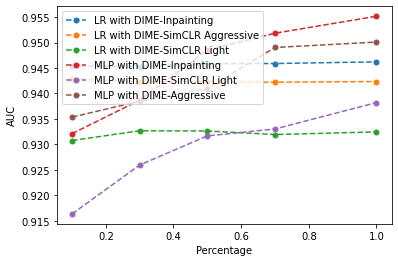

In [8]:
network_lst = ['LR with DIME-Inpainting', 'LR with DIME-SimCLR Aggressive', 'LR with DIME-SimCLR Light', 'MLP with DIME-Inpainting', 'MLP with DIME-SimCLR Light', 'MLP with DIME-Aggressive']
percentage_plot_auc(network_lst, embeddings_inpainting_test, classes_inpainting_test, embeddings_simclr_light_test, classes_simclr_light_test, embeddings_simclr_aggressive_test, classes_simclr_aggressive_test)

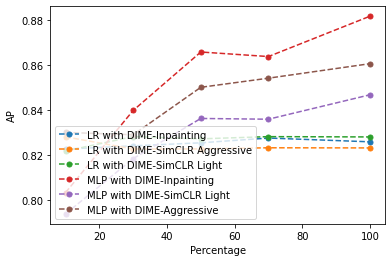

In [9]:
percentage_plot_ap(network_lst, embeddings_inpainting_test, classes_inpainting_test, embeddings_simclr_light_test, classes_simclr_light_test, embeddings_simclr_aggressive_test, classes_simclr_aggressive_test)

ACCURACIES FOR EACH NETWORK:
LR with DIME-Inpainting: 0.9610950372310949
LR with DIME-SimCLR Light: 0.9645424927382626
LR with DIME-SimCLR Aggressive: 0.9635894564844216
MLP with DIME-Inpainting: 0.9727636769249837
MLP with DIME-SimCLR Light: 0.9691338766637179
MLP with DIME-SimCLR Aggressive: 0.9714829899411226
AUC & ROC CURVE:


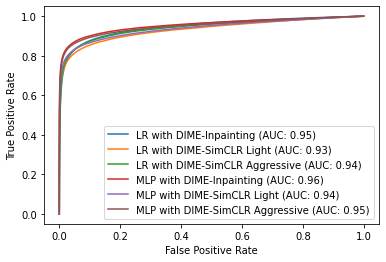

PRECISION RECALL CURVE:


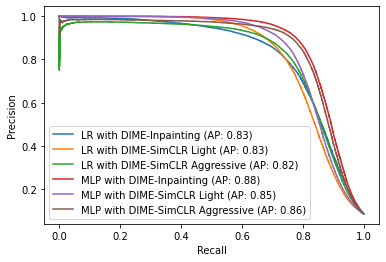

In [10]:
plot_result(LR_inpainting, LR_simclr_light, LR_simclr_aggressive, MLP_inpainting, MLP_simclr_light, MLP_simclr_aggressive, GB_inpainting, embeddings_inpainting_test, classes_inpainting_test, embeddings_simclr_light_test, classes_simclr_light_test, embeddings_simclr_aggressive_test, classes_simclr_aggressive_test)

ACCURACY:
0.9610950372310949
AUC & ROC CURVE:


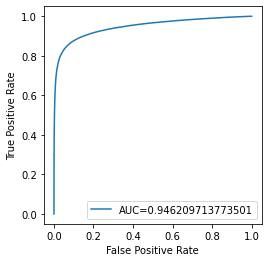

PRECISION RECALL CURVE:


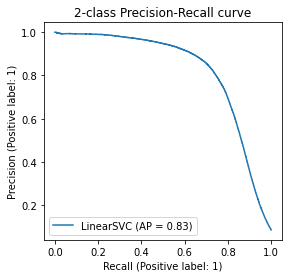

CONFUSION MATRIX:


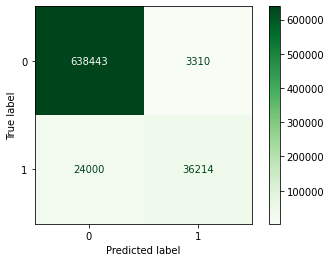

---------------------------------------
ACCURACY:
0.9645424927382626
AUC & ROC CURVE:


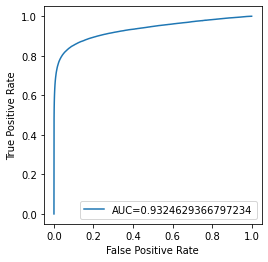

PRECISION RECALL CURVE:


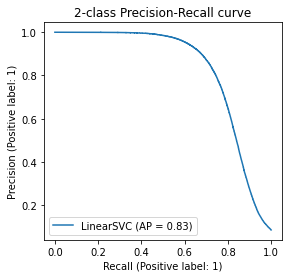

CONFUSION MATRIX:


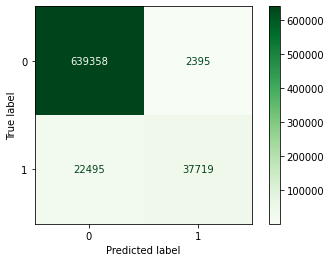

---------------------------------------
ACCURACY:
0.9635894564844216
AUC & ROC CURVE:


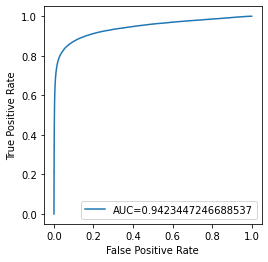

PRECISION RECALL CURVE:


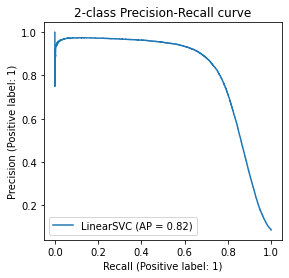

CONFUSION MATRIX:


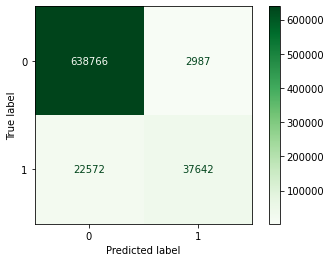

---------------------------------------
ACCURACY:
0.9727636769249837
AUC & ROC CURVE:


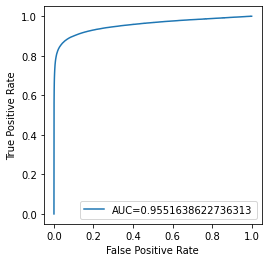

PRECISION RECALL CURVE:


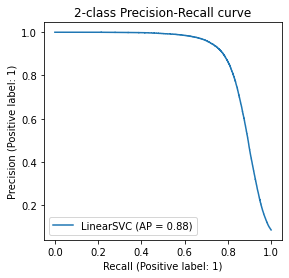

CONFUSION MATRIX:


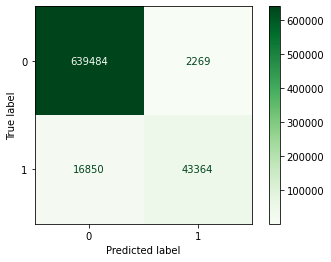

---------------------------------------
ACCURACY:
0.9691338766637179
AUC & ROC CURVE:


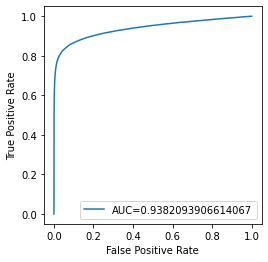

PRECISION RECALL CURVE:


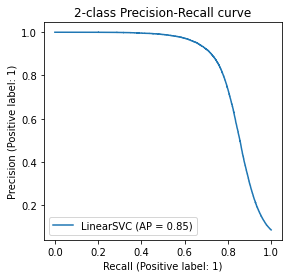

CONFUSION MATRIX:


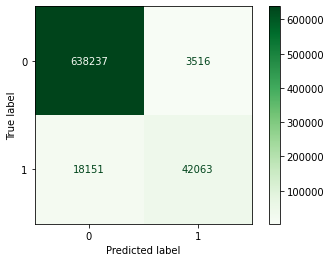

---------------------------------------
ACCURACY:
0.9714829899411226
AUC & ROC CURVE:


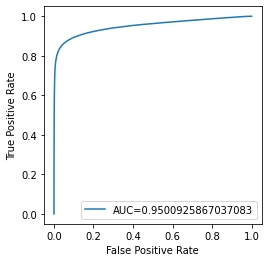

PRECISION RECALL CURVE:


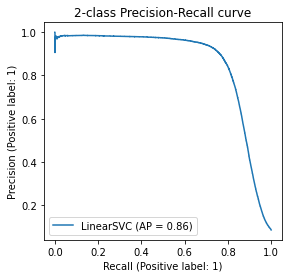

CONFUSION MATRIX:


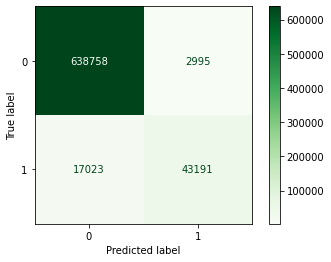

---------------------------------------
ACCURACY:
0.950447813073834
AUC & ROC CURVE:


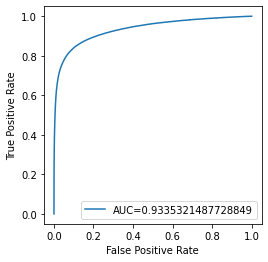

PRECISION RECALL CURVE:


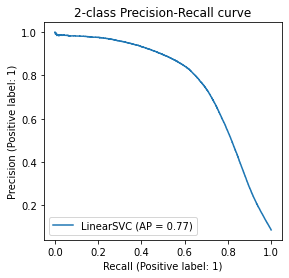

CONFUSION MATRIX:


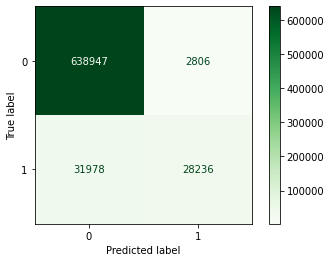

---------------------------------------
ACCURACY:
0.9521786636693748
AUC & ROC CURVE:


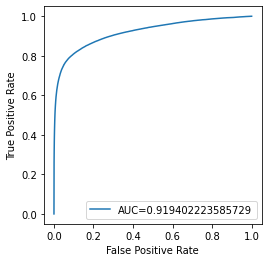

PRECISION RECALL CURVE:


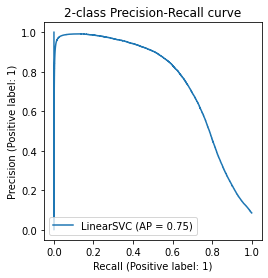

CONFUSION MATRIX:


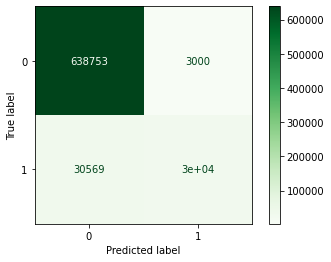

---------------------------------------
ACCURACY:
0.9550890568929878
AUC & ROC CURVE:


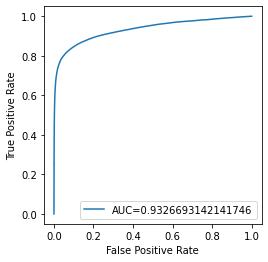

PRECISION RECALL CURVE:


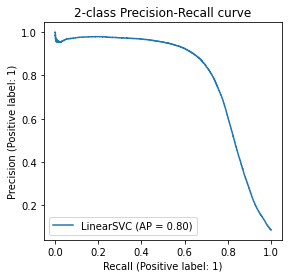

CONFUSION MATRIX:


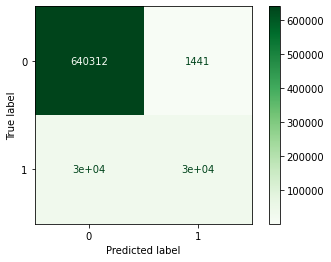

---------------------------------------


In [11]:
evaluate_network(LR_inpainting, 'LR_inpainting', embeddings_inpainting_test, classes_inpainting_test)
evaluate_network(LR_simclr_light, 'LR_simclr_light', embeddings_simclr_light_test, classes_simclr_light_test)
evaluate_network(LR_simclr_aggressive, 'LR_simclr_aggressive', embeddings_simclr_aggressive_test, classes_simclr_aggressive_test)
evaluate_network(MLP_inpainting, 'MLP_inpainting', embeddings_inpainting_test, classes_inpainting_test)
evaluate_network(MLP_simclr_light, 'MLP_simclr_light', embeddings_simclr_light_test, classes_simclr_light_test)
evaluate_network(MLP_simclr_aggressive, 'MLP_simclr_aggressive', embeddings_simclr_aggressive_test, classes_simclr_aggressive_test)
evaluate_network(GB_inpainting, 'GB_inpainting', embeddings_inpainting_test, classes_inpainting_test)
evaluate_network(GB_simclr_light, 'GB_simclr_light_0.1', embeddings_simclr_light_test, classes_simclr_light_test)
evaluate_network(GB_simclr_aggressive, 'GB_simclr_aggressive_0.1', embeddings_simclr_aggressive_test, classes_simclr_aggressive_test)

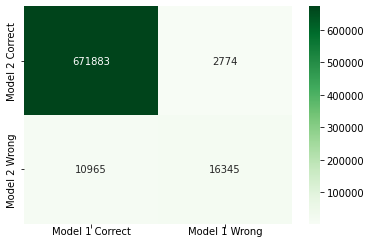

chi-squared: 4883.359851517578
p-value: 0.0


In [12]:
data = mcnemar_data_table(MLP_inpainting, LR_inpainting, embeddings_inpainting_test, embeddings_inpainting_test, classes_inpainting_test, 'inpainting')
mcnemar_test(data)

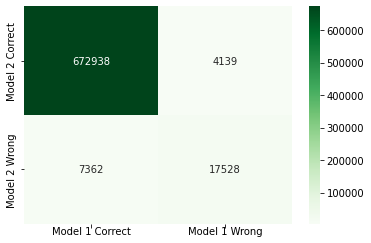

chi-squared: 903.2022432831927
p-value: 1.9755721380157818e-198


In [13]:
data = mcnemar_data_table(MLP_simclr_light, LR_simclr_light, embeddings_simclr_light_test, embeddings_simclr_light_test, classes_inpainting_test, 'simclr_light')
mcnemar_test(data)

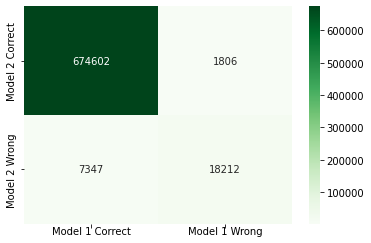

chi-squared: 3354.3844641101277
p-value: 0.0


In [14]:
data = mcnemar_data_table(MLP_simclr_aggressive, LR_simclr_aggressive, embeddings_simclr_aggressive_test, embeddings_simclr_aggressive_test, classes_inpainting_test, 'simclr_aggressive')
mcnemar_test(data)

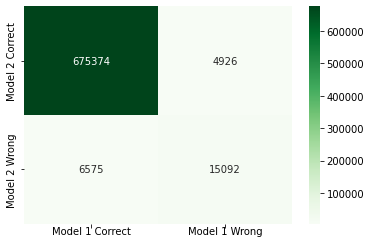

chi-squared: 236.431701591166
p-value: 2.359270254344411e-53


In [15]:
data = mcnemar_data_table(MLP_simclr_aggressive, MLP_simclr_light, embeddings_simclr_aggressive_test, embeddings_simclr_light_test, classes_inpainting_test, 'mlp_simclr')
mcnemar_test(data)

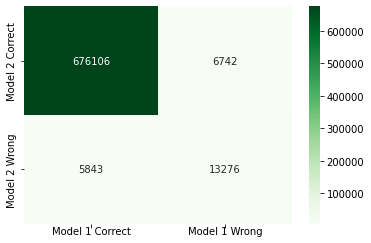

chi-squared: 64.21938816050854
p-value: 1.1130799821890233e-15


In [16]:
data = mcnemar_data_table(MLP_simclr_aggressive, MLP_inpainting, embeddings_simclr_aggressive_test, embeddings_inpainting_test, classes_inpainting_test, 'mlp_inp_agg')
mcnemar_test(data)

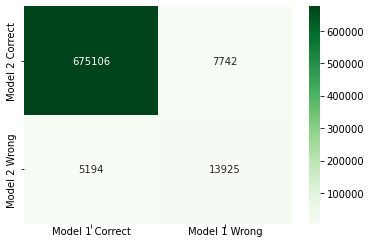

chi-squared: 501.8787878787879
p-value: 3.708390779363074e-111


In [17]:
data = mcnemar_data_table(MLP_simclr_light, MLP_inpainting, embeddings_simclr_light_test, embeddings_inpainting_test, classes_inpainting_test, 'mlp_inp_light')
mcnemar_test(data)